In [5]:
# %pip install vanna

In [2]:
import numpy as np


In [6]:
import vanna
from vanna.remote import VannaDefault

In [8]:
api_key = vanna.get_api_key('511451527@qq.com')

In [9]:
api_key

'9c4db3cb91e94a15bddf9dbede44abd9'

In [10]:
vanna_model_name = 'chinook' # This is the name of the RAG model. This is typically associated with a specific dataset.
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [11]:
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')

SELECT a.ArtistId, a.Name, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM Artist a
INNER JOIN Album al ON a.ArtistId = al.ArtistId
INNER JOIN Track t ON al.AlbumId = t.AlbumId
INNER JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 5;


,ArtistId,Name,TotalSales
0,90,Iron Maiden,138.60
1,150,U2,105.93
2,50,Metallica,90.09
3,22,Led Zeppelin,86.13
4,149,Lost,81.59


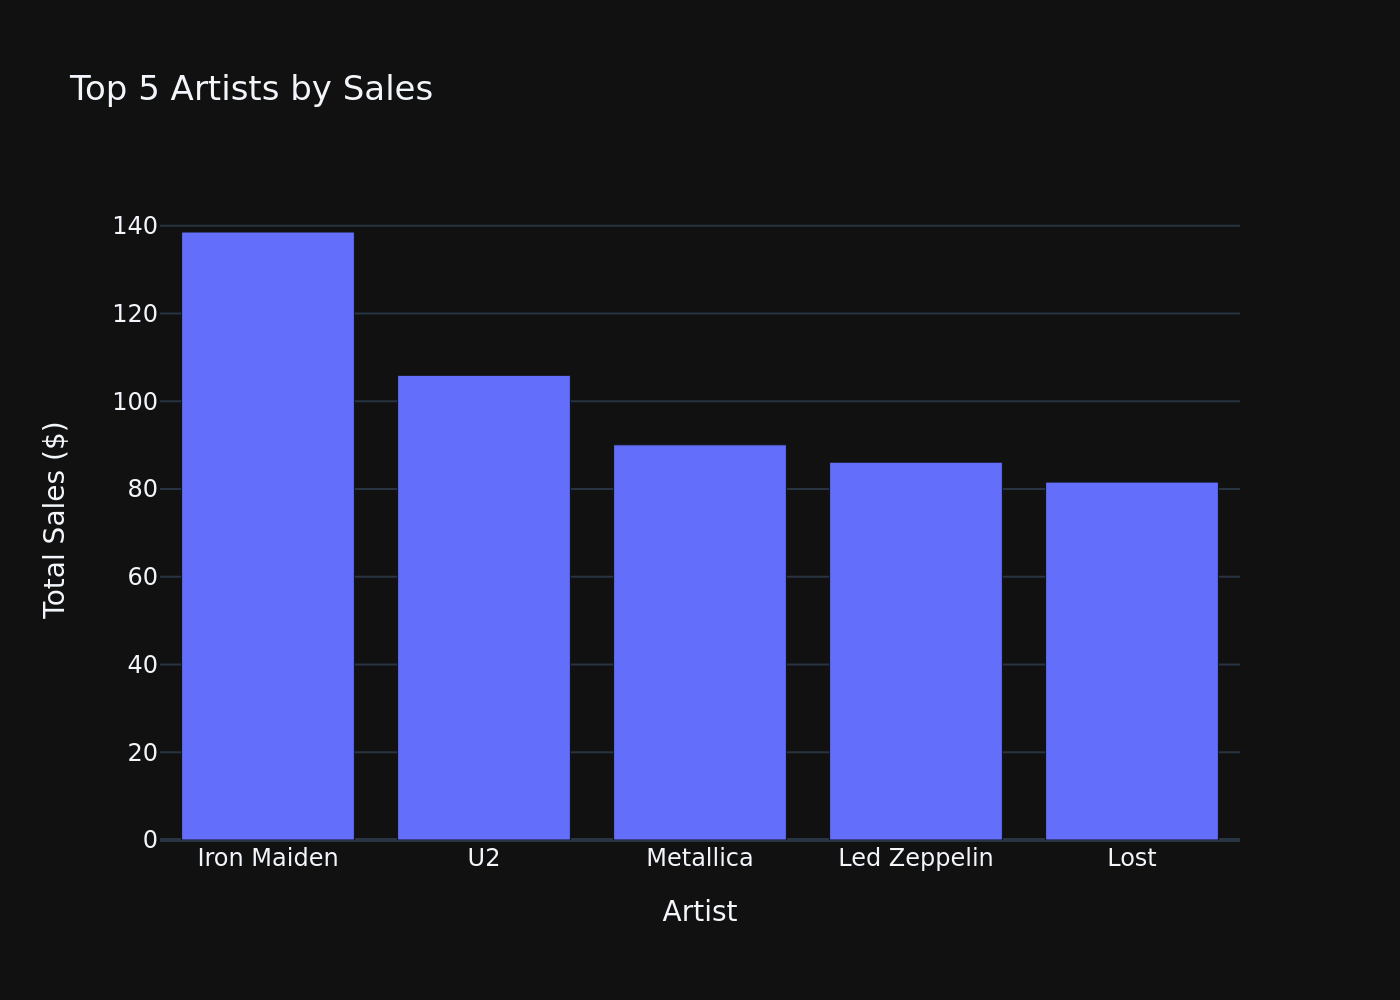

In [12]:
vn.ask("What are the top 5 artists by sales?")

SELECT a.ArtistId, a.Name, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM Artist a
INNER JOIN Album al ON a.ArtistId = al.ArtistId
INNER JOIN Track t ON al.AlbumId = t.AlbumId
INNER JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC;


,ArtistId,Name,TotalSales
0,90,Iron Maiden,138.60
1,150,U2,105.93
2,50,Metallica,90.09
3,22,Led Zeppelin,86.13
4,149,Lost,81.59
...,...,...,...
160,264,Kent Nagano and Orchestre de l'Opéra de Lyon,0.99
161,265,Julian Bream,0.99
162,266,Martin Roscoe,0.99
163,267,Göteborgs Symfoniker & Neeme Järvi,0.99


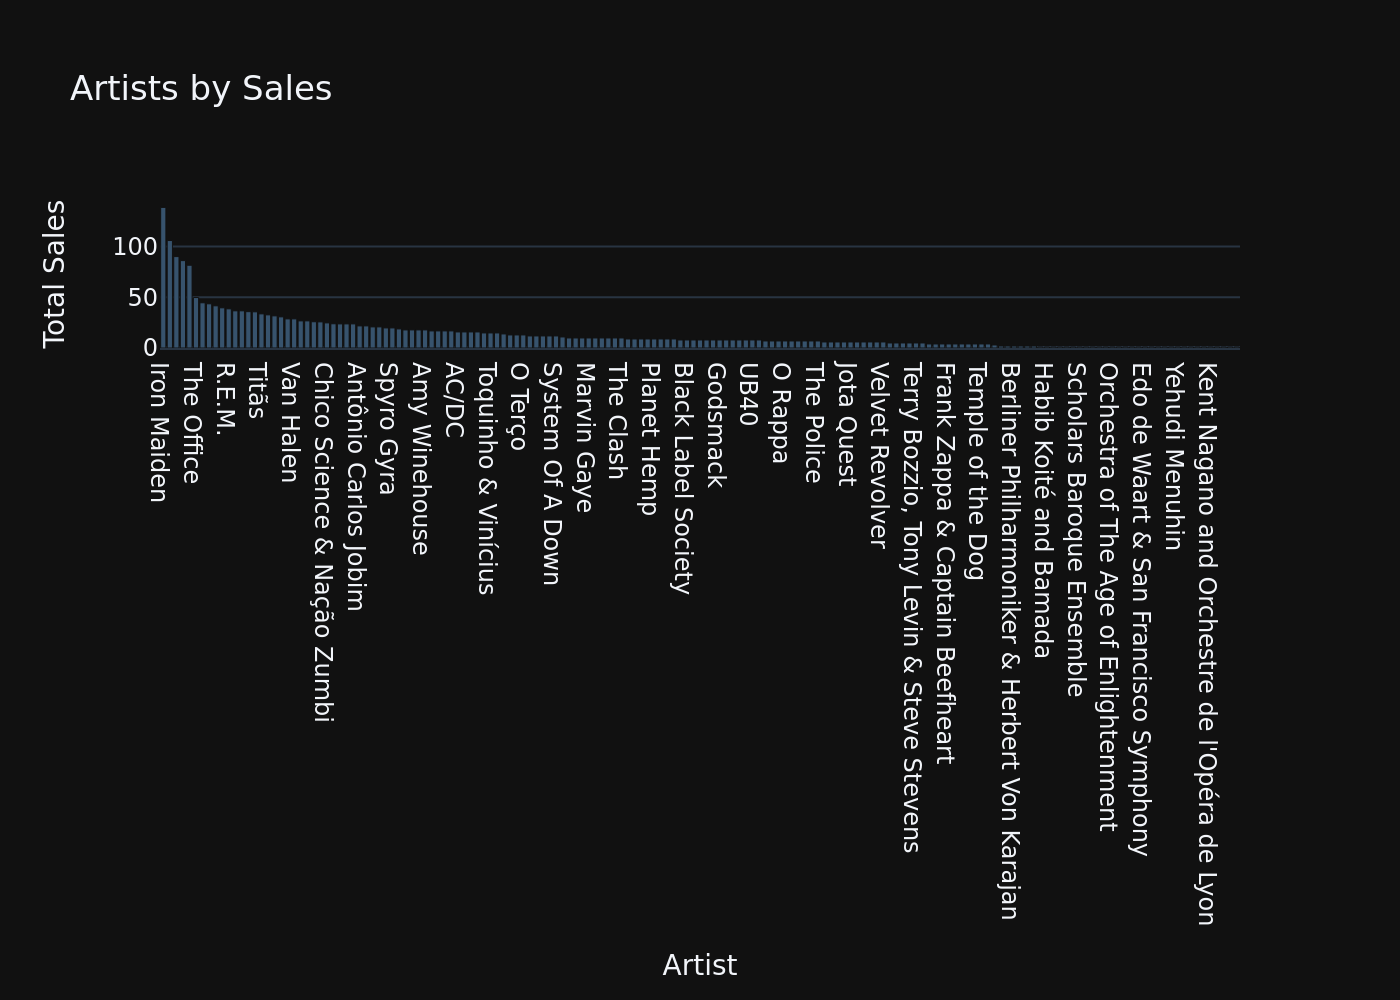

In [13]:
vn.ask("artists by sales")

SELECT a.ArtistId, a.Name, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM Artist a
INNER JOIN Album al ON a.ArtistId = al.ArtistId
INNER JOIN Track t ON al.AlbumId = t.AlbumId
INNER JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY a.ArtistId, a.Name
ORDER BY TotalSales DESC
LIMIT 5;


,ArtistId,Name,TotalSales
0,90,Iron Maiden,138.60
1,150,U2,105.93
2,50,Metallica,90.09
3,22,Led Zeppelin,86.13
4,149,Lost,81.59


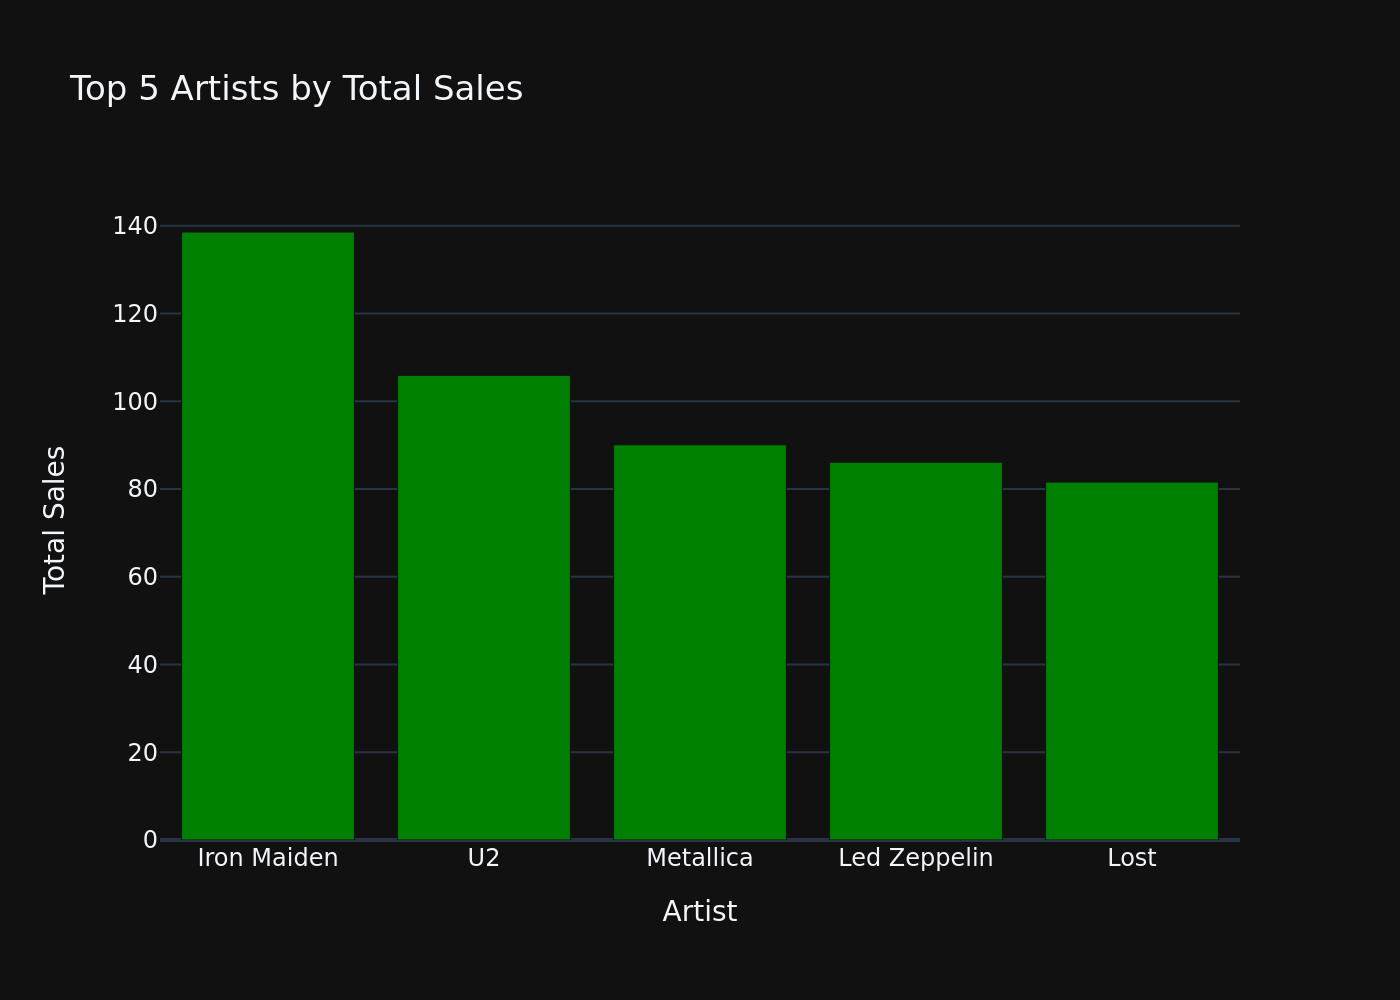

In [14]:
vn.ask("销量前5的艺术品")

In [32]:
# from vanna.flask import VannaFlaskApp
from src.vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run(port=8018)

ModuleNotFoundError: No module named 'src'

In [17]:
# %pip install flask